In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from PIL import Image

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers  import Dense, Dropout, Flatten, Conv2D,MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras import utils
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

np.random.seed(42)


%matplotlib inline

In [7]:
# directory paths
train_dir = "../input/chest_xray/chest_xray/train"
val_dir = "../input/chest_xray/chest_xray/val"
test_dir = "../input/chest_xray/chest_xray/test"

In [9]:
# Custom model
model_cnn = Sequential()
model_cnn.add(Conv2D(filters = 16, #number of filters
                 kernel_size = (3,3), # height/width of the filter
                 activation = "relu", # activation function
                 input_shape = (224,224,3) )) # shape of input(image)

model_cnn.add(MaxPooling2D(pool_size = (2,2))) # height/width of pooling
model_cnn.add(Conv2D(filters = 64, kernel_size = (3,3),activation = "relu"))
model_cnn.add(MaxPooling2D(pool_size =(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation = "relu"))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(32,activation = "relu"))
model_cnn.add(Dropout(0.5))

# Output layer
model_cnn.add(Dense(2, activation = "softmax"))

#Load weights 
model_cnn.load_weights("../output/custom_model.h5")


In [10]:
# check size of custom model
model_cnn.input, model_cnn.output
# Input shape of custom model
model_cnn.input_shape[1:3]

(224, 224)

In [11]:
# Data Generator 
#Defining image augmentation
train_idg = ImageDataGenerator(rescale = 1./255,
                               zoom_range = 0.2,
                               shear_range = 0.2,
                               rotation_range = 20,
                               horizontal_flip = True)

test_idg = ImageDataGenerator(rescale = 1./255)

#Creating data loaders
train_gen = train_idg.flow_from_directory(train_dir,
                                    model_cnn.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, #8,16,32
                                    shuffle = True)

val_gen =  test_idg.flow_from_directory(val_dir,
                                    model_cnn.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, 
                                    shuffle = True)

test_gen = test_idg.flow_from_directory(test_dir,
                                    model_cnn.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 8,
                                    shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
# Predicted classes - Predicted Positives and Predicted Negatives 
predictions_cnn = model_cnn.predict(test_gen)
pred_cnn = predictions_cnn[:,1]
predicted_classes_cnn = np.argmax(predictions_cnn,axis=1)

# True classes - True Positives and True Negatives 
true_classes_cnn = test_gen.classes
class_labels = list(test_gen.class_indices.keys())  

In [13]:
# InceptionV3 model
import tensorflow
from tensorflow.keras.applications.inception_v3 import InceptionV3

model_in = Sequential()
model_in.add(InceptionV3(include_top = False,weights ='imagenet',input_shape=(150,150,3)))
model_in.add(Dropout(0.5))
model_in.add(GlobalAveragePooling2D())
model_in.add(Dense(128, activation = "relu"))
model_in.add(BatchNormalization())

# Output layer
model_in.add(Dense(2, activation = "softmax"))

#Load weights 
model_in.load_weights("../output/inception_model.h5")

In [14]:
# check size of InceptionV3 model
model_in.input, model_in.output
# Input shape
model_in.input_shape[1:3]

(150, 150)

In [15]:
# Data Generator 
#Defining image augmentation
train_idg = ImageDataGenerator(rescale = 1./255,
                               zoom_range = 0.2,
                               shear_range = 0.2,
                               rotation_range = 20,
                               horizontal_flip = True)

test_idg = ImageDataGenerator(rescale = 1./255)

#Creating data loaders
train_gen = train_idg.flow_from_directory(train_dir,
                                    model_in.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, 
                                    shuffle = True)

val_gen =  test_idg.flow_from_directory(val_dir,
                                    model_in.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, 
                                    shuffle = True)

test_gen = test_idg.flow_from_directory(test_dir,
                                    model_in.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 8,
                                    shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
# Predicted classes - Predicted Positives and Predicted Negatives 
predictions_in = model_in.predict(test_gen)
pred_in = predictions_in[:,1]
predicted_classes_in = np.argmax(predictions_in,axis=1)

# True classes - True Positives and True Negatives 
true_classes_in = test_gen.classes
class_labels = list(test_gen.class_indices.keys())  

In [17]:
# Resnet50 model
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50

model_res = Sequential()
model_res.add(ResNet50(include_top = False, weights = "imagenet", input_shape=(150,150,3)))
model_res.add(Dropout(0.5))
model_res.add(GlobalAveragePooling2D())
model_res.add(Dense(128,  activation = "relu"))
model_res.add(BatchNormalization())

# Output layer
model_res.add(Dense(2, activation = "softmax"))

#Load weights 
model_res.load_weights("../output/resnet50_model.h5")

#for layer in model_res.layers:
    # make not trainable
    #layer.trainable = False

In [18]:
# check size of Resnet50 model
model_res.input, model_res.output
# Input shape of baseline model
model_res.input_shape[1:3]

(150, 150)

In [19]:
# Data Generator 
#Defining image augmentation
train_idg = ImageDataGenerator(rescale = 1./255,
                               zoom_range = 0.2,
                               shear_range = 0.2,
                               rotation_range = 20,
                               horizontal_flip = True)

test_idg = ImageDataGenerator(rescale = 1./255)

#Creating data loaders
train_gen = train_idg.flow_from_directory(train_dir,
                                    model_res.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, 
                                    shuffle = True)

val_gen =  test_idg.flow_from_directory(val_dir,
                                    model_res.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 16, 
                                    shuffle = True)

test_gen = test_idg.flow_from_directory(test_dir,
                                    model_res.input_shape[1:3],
                                    color_mode = "rgb",
                                    seed = 42,
                                    batch_size = 8,
                                    shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
# Predicted classes - Predicted Positives and Predicted Negatives 
predictions_res = model_res.predict(test_gen)
pred_res = predictions_res[:,1]
predicted_classes_res = np.argmax(predictions_res,axis=1)

# True classes - True Positives and True Negatives 
true_classes_res = test_gen.classes
class_labels = list(test_gen.class_indices.keys()) 

In [21]:
plt.style.use('seaborn')

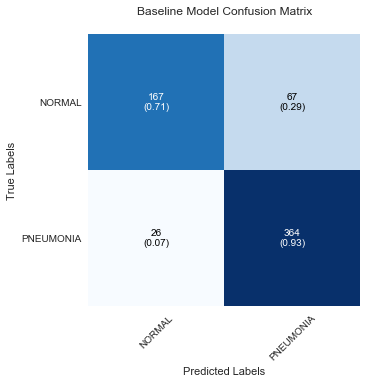

In [22]:
# Create Confusion Matrix
cm = metrics.confusion_matrix(true_classes_cnn,predicted_classes_cnn)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5),
                                class_names = class_labels,
                                show_normed = True)
ax.set(title = "Baseline Model Confusion Matrix",
       ylabel = "True Labels",
       xlabel = "Predicted Labels")
plt.show()

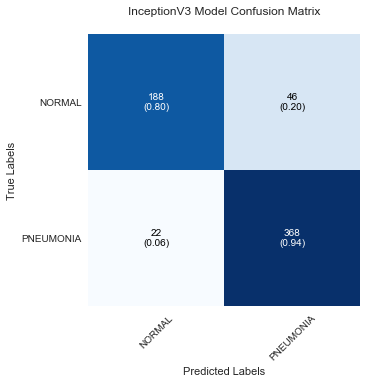

In [23]:
# Create Confusion Matrix
cm = metrics.confusion_matrix(true_classes_in,predicted_classes_in)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5),
                                class_names = class_labels,
                                show_normed = True)
ax.set(title = "InceptionV3 Model Confusion Matrix",
       ylabel = "True Labels",
       xlabel = "Predicted Labels")
plt.show()

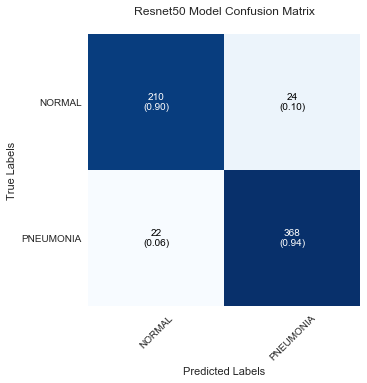

In [24]:
# Create Confusion Matrix
cm = metrics.confusion_matrix(true_classes_res,predicted_classes_res)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5),
                                class_names = class_labels,
                                show_normed = True)
ax.set(title = "Resnet50 Model Confusion Matrix",
       ylabel = "True Labels",
       xlabel = "Predicted Labels")
plt.show()

## ROC graph
ROC curve graph of the models built to classify Pneumonia vs Normal chest X-rays

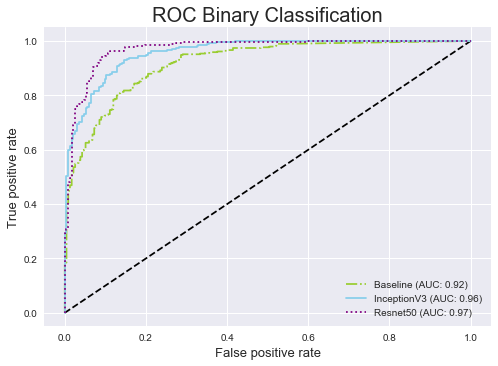

In [38]:
from sklearn.metrics import roc_curve, auc

fpr0, tpr0, _ = roc_curve(true_classes_cnn, pred_cnn)
fpr1, tpr1, _ = roc_curve(true_classes_in, pred_in)
fpr2, tpr2, _ = roc_curve(true_classes_res, pred_res)

# ROC curve graph for all models

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='Baseline (AUC: %0.2f)'
             % auc(fpr0,tpr0), color= "yellowgreen", linestyle = '-.')
plt.plot(fpr1, tpr1, label='InceptionV3 (AUC: %0.2f)'
             % auc(fpr1,tpr1), color = "skyblue")
plt.plot(fpr2, tpr2, label='Resnet50 (AUC: %0.2f)'
             % auc(fpr2,tpr2), color = "purple", linestyle = ':')
plt.xlabel('False positive rate', fontsize = 13)
plt.ylabel('True positive rate', fontsize = 13)
plt.title('ROC Binary Classification', fontsize = 20)
plt.legend(loc='best')
plt.show()

## Binary Classification Results
|                     	| Accuracy 	| AUROC 	| Recall            	| Precision         	|
|:-------------------:	|----------	|-------	|-------------------	|-------------------	|
| Custom              	| 85.1%    	| 0.92  	| 0.93(P)   0.71(N) 	| 0.84(P)   0.87(N) 	|
| Adapted InceptionV3 	| 89.1%    	| 0.96  	| 0.94(P)   0.80(N) 	| 0.89(P)   0.90(N) 	|
| Adapted Resnet50    	| 92.6%    	| 0.97  	| 0.94(P)   0.90(N) 	| 0.94(P)   0.91(N) 	|